In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

import matplotlib

# matplotlib.rcParams['font.sans-serif']=['Symbola'] 
# matplotlib.rcParams['axes.unicode_minus']=False   

# font_path = '/usr/share/fonts/truetype/ancient-scripts/Symbola_hint.ttf'
# prop = mfm.FontProperties(fname=font_path)

In [2]:
# import emoji
# emoji.emojize('Phd is very easy!!! :house:')

In [3]:
# from fontTools.ttLib import TTFont
# import matplotlib.font_manager as mfm

# def char_in_font(Unicode_char, font):
#     for cmap in font['cmap'].tables:
#         if cmap.isUnicode():
#             if ord(Unicode_char) in cmap.cmap:
#                 return True
#     return False

# uni_char =  u'🍞'

# font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

# for i, font in enumerate(font_info):
#     if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
#         print(font[0], font[1])

In [147]:
store_results = {'exp':[],'even':[]}

In [149]:
for qq in range(8):
    N = 100        # number or people
    M = 20          # number of goods
    item_chars = [':bread:',':house:']

    max_items = 10
    inventory = np.random.randint(0,max_items,(N,M))

    total_cash = 10000

    cash_var = 4

    # roughly even distribution of money
    cash = np.abs(cash_var*np.random.randn(N))


    exponential_cash = np.random.random()<0.5
    #  exponential distribution of money
    if exponential_cash:
        cash = np.exp(cash_var*np.random.randn(N))


    cash = cash/cash.sum()*total_cash

    utility_universal = 1*np.random.random(M)
    utility_var = 1
    utility = np.abs(utility_var*np.random.randn(N,M))
    utility += np.array([u for u in utility_universal])
    utility_downweight = np.random.random((N,M))

    price_array = utility.mean(axis=0)
    price_array = cash.sum()/inventory.sum()*price_array/price_array.mean()
    prices = [[price_array[j]] for j in range(M)]
    price_var = 0.1

    def get_utility(inv, u):
        total = np.zeros(len(inv))
        for i in range(inv.max()):
            total += ((inv>i) * u*utility_downweight**i).sum(axis=1)
        return total

    orig_inv = inventory.sum()
    orig_cash = cash.sum()

    print(get_utility(inventory, utility).sum())

    utility_list = [get_utility(inventory, utility)]
    inventory_list = [inventory.copy()]
    cash_list = [cash.copy()]
    
    total_iter = 10000
    num_trials = 10
    num_trades = 0
    for iter_num in range(total_iter):
        i = np.random.randint(N)
        probs = utility[i]*utility_downweight[i]**inventory[i]
        probs = probs/probs.sum()
        item_i = np.random.choice(range(M),p=probs)
        p_item_i = -1
        while p_item_i <= 0:
            p_item_i = np.array(prices[item_i]).mean()+np.random.randn()*price_var
            if len(prices[item_i]) < 5:
                if len(utility_list) > 10*M:
                    p_item_i *= 2
            else:
                p_item_i = np.array(prices[item_i][-5:]).mean()+np.random.randn()*price_var
        if p_item_i > cash[i]:
            p_item_i = cash[i]
        for t in range(num_trials):
            j=-1
            item_j = -1
            fail=0
            while j<0 or inventory[j,item_i]<1 or item_j < 0 or item_j == item_i or p_item_i / p_item_j < (utility[j][item_i]*utility_downweight[j][item_i]**(inventory[j][item_i]-1)) / (utility[j][item_j]*utility_downweight[j][item_j]**inventory[j][item_j]):
                fail += 1
                if fail > 10:
                    break
                j = np.random.randint(N-1)
                if j>=i:
                    j+=1
                if inventory[j][item_i]<1:
                    continue
                probs = 1/(utility[j]*utility_downweight[j]**inventory[j])
                probs = probs/probs.sum()
                item_j = np.random.choice(range(M),p=probs)
                p_item_j = np.array(prices[item_j]).mean()
                if len(prices[item_j])>5:
                    p_item_j = np.array(prices[item_j][-5:]).mean()
            if fail > 10:
                continue
            if (p_item_i / p_item_j > (utility[j][item_i]*utility_downweight[j][item_i]**(inventory[j][item_i]-1)) / (utility[j][item_j]*utility_downweight[j][item_j]**inventory[j][item_j])) and (inventory[j,item_i]>0):
                inventory[i,item_i]+=1
                inventory[j,item_i]-=1
                cash[i]-=p_item_i
                cash[j]+=p_item_i
                num_trades += 1
                prices[item_i].append(p_item_i)
                break
        utility_list.append(get_utility(inventory, utility))
        inventory_list.append(inventory.copy())
        cash_list.append(cash.copy())

    assert abs(inventory.sum() - orig_inv)< 0.001
    assert abs(orig_cash - cash.sum())< 0.001

    print(num_trades)
    print(get_utility(inventory, utility).sum())
    if exponential_cash:
        store_results['exp'].append([s.sum() for s in utility_list])
    else:
        store_results['even'].append([s.sum() for s in utility_list])

5155.305087465876
2922
5946.679350882398
4608.304821830456
706
4993.936059389969
4744.232843851355
3053
5624.931535499382
5372.079029292673
3090
6165.616356859852
4891.310310787965
1000
5394.0345009672155
4921.79729679859
4173
5967.014866136416
5008.744991991012
1023
5631.734191974938
4622.717574402543
1063
5047.929097504381


In [153]:
store_results['even'][0]

[5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5155.305087465876,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5156.934404485344,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5157.439964880335,
 5159.5106277411705,
 5159.5106277411705,
 5159.5106277411705,
 5159.5106277411705,
 5159.5106277411705,
 5161.320247251232,
 5161.320247251232,
 5161.320247251232,
 5161.758273572682,
 5161.758273572682,
 5162.248711691775,
 5162.248711691775,
 5162.248711691775,
 5162.248711691775,
 5162.248711691775,
 5162.248711691775,
 5162.248711691775,
 5164.005997871572,
 5164.005997871572,
 5164.005997871572,
 5164.005997871572,
 5164.005997871572,
 5164.005997871572,
 5164.005997871

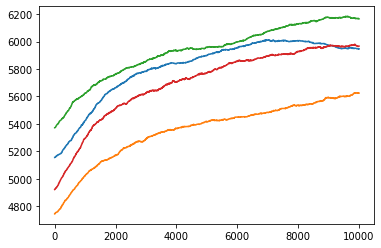

In [156]:
plt.plot(store_results['even'][0])
plt.plot(store_results['even'][1])
plt.plot(store_results['even'][2])
plt.plot(store_results['even'][3])


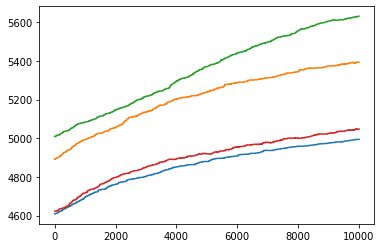

In [157]:
plt.plot(store_results['exp'][0])
plt.plot(store_results['exp'][1])
plt.plot(store_results['exp'][2])
plt.plot(store_results['exp'][3])


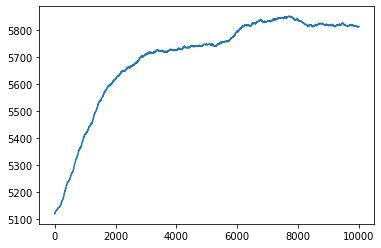

In [146]:
plt.plot([s.sum() for s in utility_list])

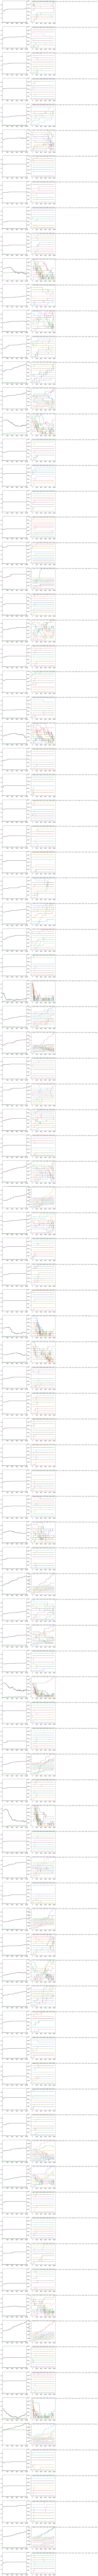

In [116]:
ymax = np.array(utility_list).max()
cmax = np.array(cash_list).max()
plt.figure(figsize=(5*2,5*N))
spt = 1
for ind in range(N):
    ax = plt.subplot(N,2,spt)
    plt.plot([c[ind] for c in utility_list],c='black')
    plt.xlim([0,len(utility_list)])
    plt.ylim([0,ymax])
    ax2 = ax.twinx()
    plt.plot([c[ind] for c in cash_list],c='green')
    plt.xlim([0,len(cash_list)])
    plt.ylim([0,cmax])
    spt += 1
    ax = plt.subplot(N,2,spt)
    tst = [c[ind] for c in inventory_list]
    plt.plot(tst)
    plt.annotate([f'{a:.2f}' for a in utility[ind]],(0,np.array(tst).max()+0.01))
    spt += 1

In [60]:
def plot_inventory(inventory, N, M, utility,t=None,util_list=None,cash_list=None,colors=None):
    fig = plt.figure(figsize=[1.5*(M+1),1.5*N])
    width = np.ceil(np.sqrt(inventory.max()))
    c = 1
    ymax = np.array(util_list).max()
    cmax = np.array(cash_list).max()
    for i in range(N):
        for j in range(M):
            ax = plt.subplot(N,M+1,c)
            x = inventory[i][j] // width
            y = inventory[i][j] % width
            xx = [t // width for t in range(inventory[i][j])]
            yy = [t % width for t in range(inventory[i][j])]
            plt.plot([width,width], [0,utility[i][j]],c='black')
            plt.scatter(xx,yy,marker='o',c=colors[j])
#             for p in range(len(xx)):    
#                 plt.annotate(emoji.emojize(item_chars[j]),(xx[p], yy[p]),
#                 ha="center",
#                 va="bottom")
            plt.xlim([-0.5,width+0.5])
            plt.ylim([-0.5,width+0.5])
            ax.set_xticks([], [])
            ax.set_yticks([], [])
            if j==0:
                plt.ylabel(i)
            if i==N-1:
                plt.xlabel(j)
            c+=1
        ax = plt.subplot(N,M+1,c)
        plt.plot(range(t),[u[i] for u in util_list[:t]],c='black')
        plt.xlim([0,len(util_list)])
        plt.ylim([0,ymax])
        ax.set_xticks([], [])
        ax.set_yticks([], [])    
        ax2 = ax.twinx()
        plt.plot(range(t),[c[i] for c in cash_list[:t]],c='green')
        plt.xlim([0,len(cash_list)])
        plt.ylim([0,cmax])
        ax2.set_xticks([], [])
        ax2.set_yticks([], [])    
        c+=1
    return fig

IndexError: list index out of range

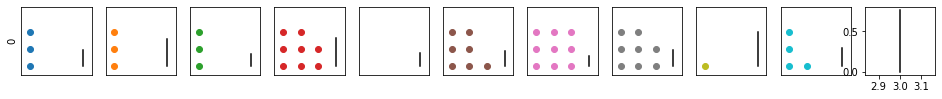

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

clrs = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

def plot_for_offset(inventory, N, M,utility,i=None,utility_list=None,cash_list=None):
    # Data for plotting
    fig = plot_inventory(inventory,N,M,utility,i,utility_list,cash_list,colors=clrs)
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image

fps = 4
kwargs_write = {'fps':fps, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(inventory_list[i],N,M,utility,i,utility_list,cash_list) for i in range(0,len(inventory_list),int(len(inventory_list)/10))], fps=fps)